In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

import env
import wrangle
import scale

In [2]:
from wrangle import wrangle_telco

from wrangle import split

In [3]:
from scale import scale_data

In [4]:
df = wrangle_telco()

In [5]:
df.head()

,monthly_charges,tenure,total_charges
customer_id,,,
0013-SMEOE,109.70,71,7904.25
0014-BMAQU,84.65,63,5377.80
0016-QLJIS,90.45,65,5957.90
0017-DINOC,45.20,54,2460.55
0017-IUDMW,116.80,72,8456.75


In [6]:
df.shape

(1685, 3)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1685 entries, 0013-SMEOE to 9995-HOTOH
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   monthly_charges  1685 non-null   float64
 1   tenure           1685 non-null   int64  
 2   total_charges    1685 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 52.7+ KB


In [8]:
train, validate, test = split(df)

In [9]:
train.shape

(943, 3)

In [10]:
validate.shape

(405, 3)

In [11]:
test.shape

(337, 3)

In [12]:
train.head()

,monthly_charges,tenure,total_charges
customer_id,,,
6586-MYGKD,76.95,70,5289.80
1270-XKUCC,19.70,30,599.25
6425-JWTDV,19.25,48,855.10
6916-HIJSE,84.85,65,5459.20
8173-RXAYP,19.70,24,452.55


# 1. Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.

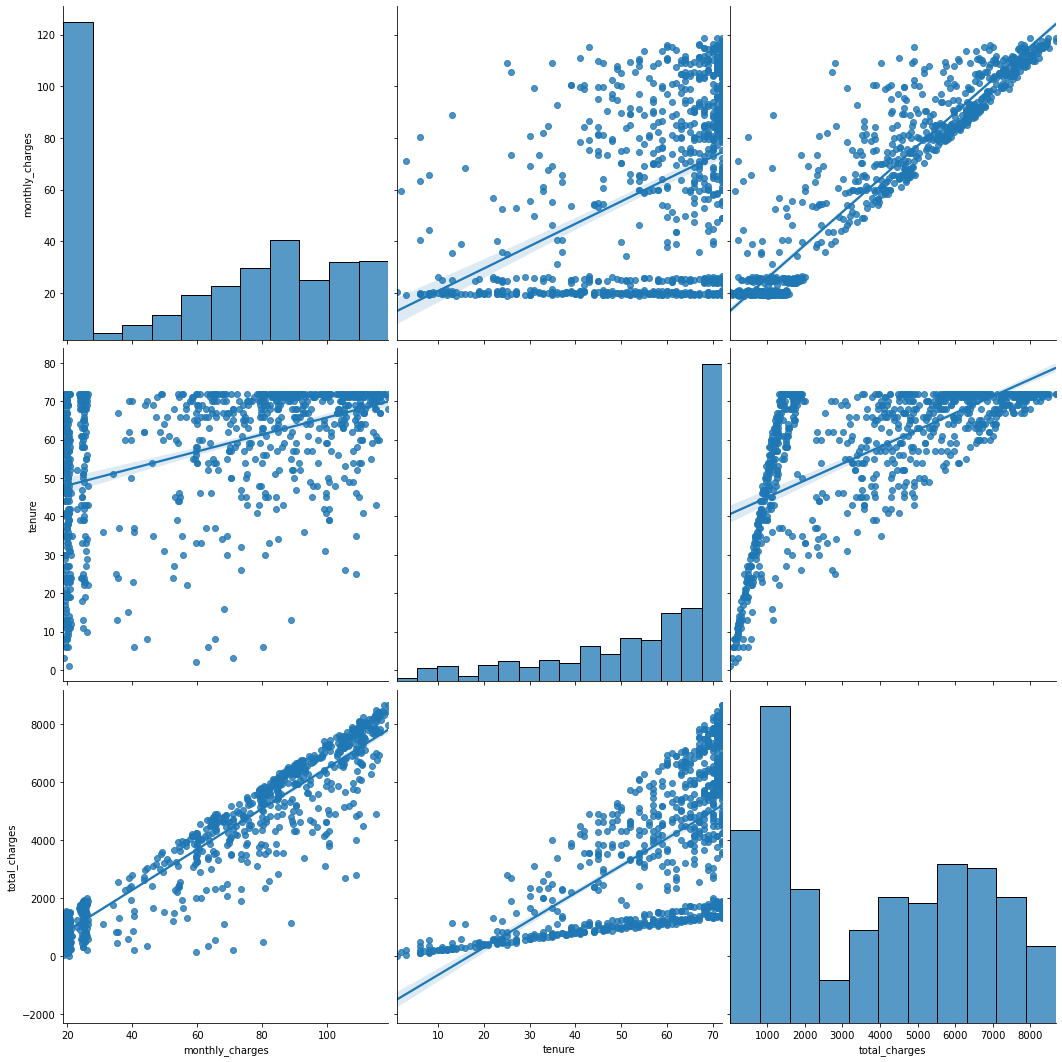

In [13]:
sns.pairplot(train, kind = 'reg', height=5)

In [14]:
train.corr()

,monthly_charges,tenure,total_charges
monthly_charges,1.000000,0.438030,0.948525
tenure,0.438030,1.000000,0.643877
total_charges,0.948525,0.643877,1.000000


<AxesSubplot:>

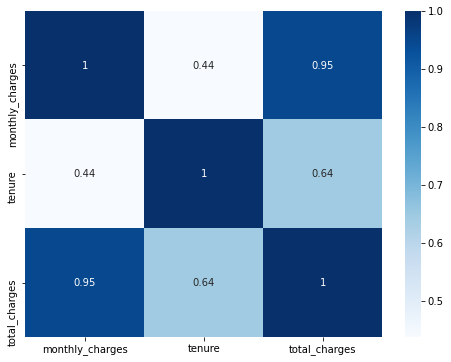

In [15]:
plt.figure(figsize=(8,6))
sns.heatmap(train.corr(), cmap='Blues', annot=True)

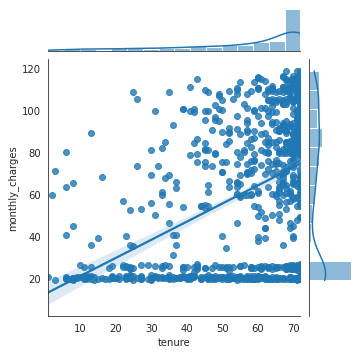

In [16]:
with sns.axes_style('white'):
    j = sns.jointplot("tenure", "monthly_charges", data=train, kind='reg', height=5);
plt.show()

In [17]:
def plot_variable_pairs(df):
    pairplot = sns.pairplot(df, kind = 'reg', height=3)
    # creates a pairplot that includes a regression line
    
    correlation = train.corr()
    # makes a readable correlation report
    
    return pairplot, correlation
    

(<seaborn.axisgrid.PairGrid at 0x7ff6ce1df220>,
                  monthly_charges    tenure  total_charges
 monthly_charges         1.000000  0.438030       0.948525
 tenure                  0.438030  1.000000       0.643877
 total_charges           0.948525  0.643877       1.000000)

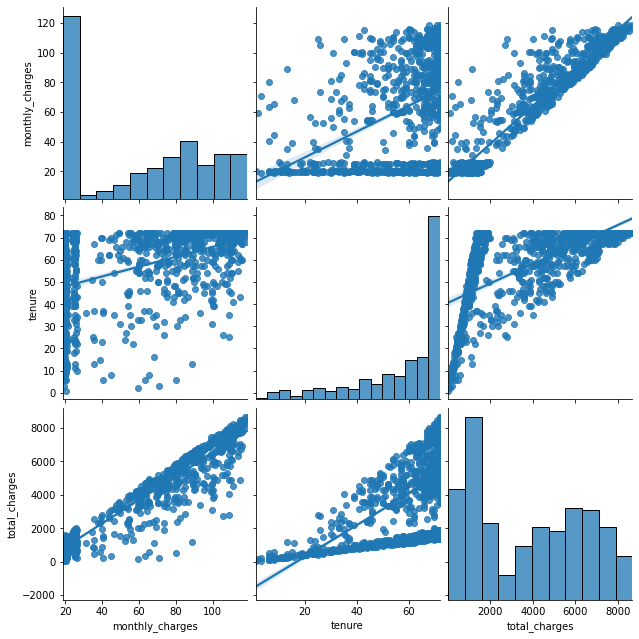

In [18]:
plot_variable_pairs(train)

# 2. Write a function named months_to_years that accepts your telco churn dataframe and returns a dataframe with a new feature tenure_years, in complete years as a customer.

In [27]:
# df['tenure_years'] = (df['tenure'] / 12).round(0).astype('int')

In [28]:
# df['tenure_years']

customer_id
0013-SMEOE    6
0014-BMAQU    5
0016-QLJIS    5
0017-DINOC    4
0017-IUDMW    6
             ..
9964-WBQDJ    6
9972-EWRJS    6
9975-GPKZU    4
9993-LHIEB    6
9995-HOTOH    5
Name: tenure_years, Length: 1685, dtype: int64

In [29]:
# df.head()

,monthly_charges,tenure,total_charges,tenure_years
customer_id,,,,
0013-SMEOE,109.70,71,7904.25,6
0014-BMAQU,84.65,63,5377.80,5
0016-QLJIS,90.45,65,5957.90,5
0017-DINOC,45.20,54,2460.55,4
0017-IUDMW,116.80,72,8456.75,6


In [30]:
def months_to_years(df):
    df['tenure_years'] = (df['tenure'] / 12).round(0).astype('int')
    
    return df

In [32]:
months_to_years(df)

,monthly_charges,tenure,total_charges,tenure_years
customer_id,,,,
0013-SMEOE,109.70,71,7904.25,6
0014-BMAQU,84.65,63,5377.80,5
0016-QLJIS,90.45,65,5957.90,5
0017-DINOC,45.20,54,2460.55,4
0017-IUDMW,116.80,72,8456.75,6
...,...,...,...,...
9964-WBQDJ,24.40,71,1725.40,6
9972-EWRJS,19.25,67,1372.90,6
9975-GPKZU,19.75,46,856.50,4
